In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/butterfly-dataset/leedsbutterfly/README.txt
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0020155.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0090177.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0090201.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0100038.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0070055.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0060059.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0070068.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0070044.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0090114.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0070099.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0050049.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0020112.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0100023.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0040082.png
/kaggle/input/butt

In [2]:
image_dir = "/kaggle/input/butterfly-dataset/leedsbutterfly/images"
mask_dir = "/kaggle/input/butterfly-dataset/leedsbutterfly/segmentations"

In [3]:
import os
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint



2025-08-02 03:39:56.353551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754105996.560363      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754105996.618418      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import matplotlib.pyplot as plt
import PIL as Image
import numpy as np 


In [5]:
import cv2

In [22]:
# def load_data(image_dir,mask_dir):
    

#     # images_list = []
#     # mask_list = []

#     images_list = os.listdir(image_dir)
#     mask_list = os.listdir(mask_dir)

#     # now we get all the images in the list 

#     print(len(images_list))
#     print(len(mask_list))
    
#     return images_list,mask_list

In [23]:
# img , mask = load_data(image_dir,mask_dir)

In [24]:
# # plt.imshow(img[0])
# # plt.imshow(mask[0])
# img[0].shape

In [6]:
#  first join the path then do perfect matching in image and mask and then show
import re

In [7]:
image_dir = "/kaggle/input/butterfly-dataset/leedsbutterfly/images"
mask_dir = "/kaggle/input/butterfly-dataset/leedsbutterfly/segmentations"

In [8]:
def load_data(img_dir,mask_dir):

    img = []
    mask = []

    images = os.listdir(img_dir)

    # for img in images:
    masks = [re.sub("\.png","_seg0.png",imgs) for imgs in images]
        
    
    
    for i ,m in zip(images,masks):
       im = os.path.join(img_dir,i)
       mk = os.path.join(mask_dir,m)
       
       img.append(im)
       mask.append(mk)

    return img,mask
        
    

In [9]:
img,mask = load_data(image_dir,mask_dir)

In [10]:
img[0]

'/kaggle/input/butterfly-dataset/leedsbutterfly/images/0020155.png'

In [11]:
a = plt.imread(img[0])

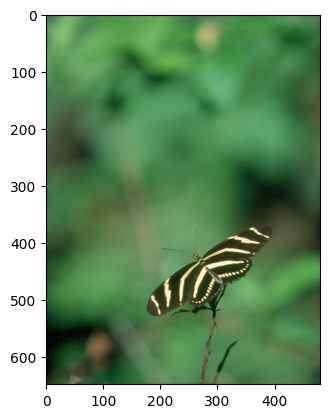

In [12]:
plt.imshow(a)

<class 'numpy.ndarray'>


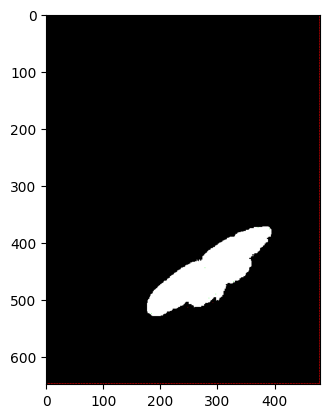

In [13]:
b = plt.imread(mask[0])

plt.imshow(b)
print(type(b))

- great now we have correct order of images with the corresponding mask

In [14]:
# for img
# img,mask
arr_img = []
arr_mask = []
for im ,mk in zip(img,mask):
    a = cv2.imread(im)
    a = a/255.
    a = cv2.resize(a,(256,256))
    # a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    
    
    b = cv2.imread(mk, cv2.IMREAD_GRAYSCALE) 
    b = b/255.
    b = cv2.resize(b,(256,256))
    
    arr_img.append(a)
    arr_mask.append(b)
    
    

In [15]:
arr_img = np.array(arr_img)
print(arr_img.shape)

arr_mask = np.array(arr_mask)
# arr_mask = cv2.reshape(arr_mask,(832,256,256,1))
arr_mask = np.expand_dims(arr_mask, axis=-1)

print(arr_mask.shape)

(832, 256, 256, 3)
(832, 256, 256, 1)


- now we got the array of images and masks

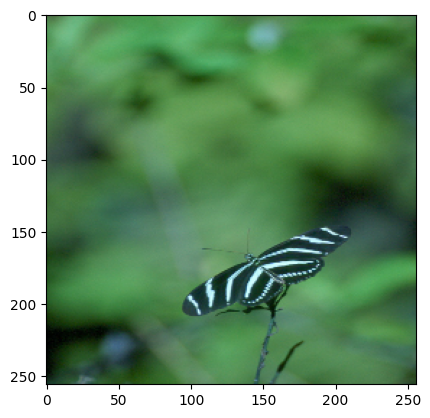

In [16]:
plt.imshow(arr_img[0])

In [17]:
arr_img[0].shape

(256, 256, 3)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_val,y_train,y_val = train_test_split(arr_img,arr_mask,test_size = 0.2,random_state = 42)

In [63]:
len(x_train),len(x_val),len(y_train),len(y_val)
pred_image = x_val[1]


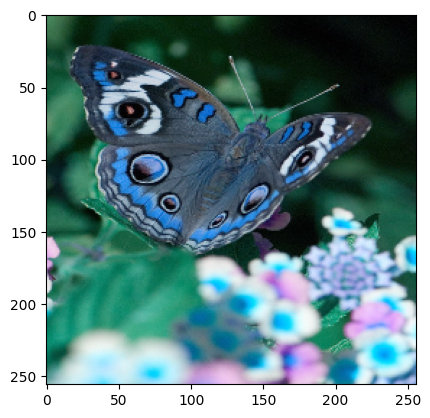

In [42]:
plt.imshow(pred_image)

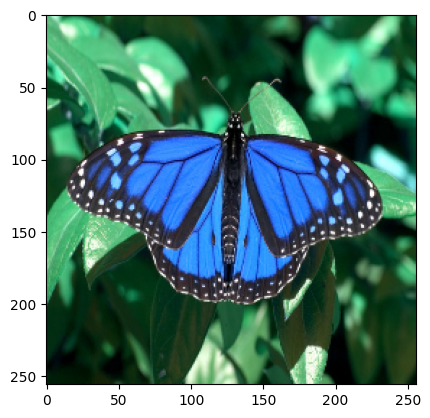

In [21]:
plt.imshow(x_train[0])

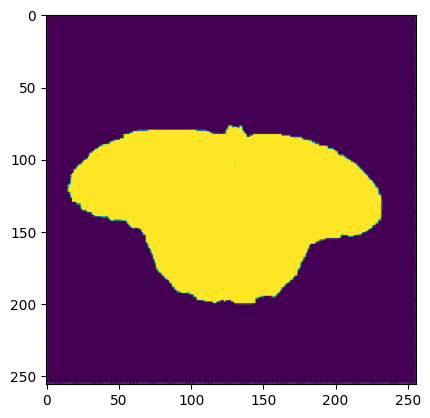

In [22]:
plt.imshow(y_train[0])

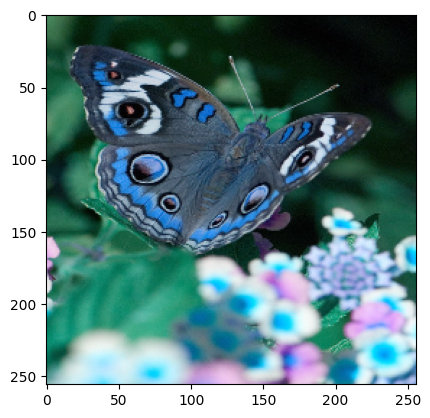

In [23]:
plt.imshow(x_val[0])

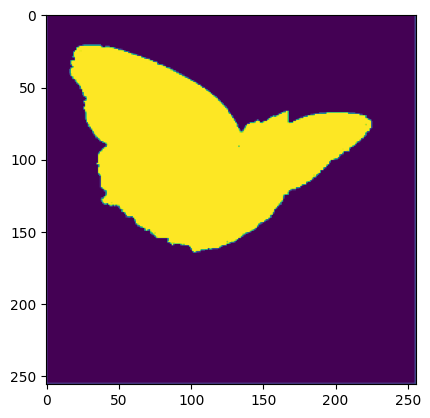

In [24]:
plt.imshow(y_val[0])

In [25]:
# now build the model
# conv - 3x3 padding same keranl-we need to define 

In [26]:
from tensorflow.keras.layers import *
def convolution_block(tensor , num_filters=32):
    x = Conv2D(num_filters, (3,3),padding = "same",kernel_initializer = "he_normal",use_bias = False)(tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, (3,3),padding = "same" ,kernel_initializer = "he_normal",use_bias = False)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x
    

In [27]:
def build_model(input_shape = (256,256,3)):
    
    inputs  = Input(input_shape)

    c1 = convolution_block(inputs)  # 256x256x32
    p1 = MaxPooling2D((2,2))(c1)   # 128x128x32
    p1 = Dropout(0.1)(p1)

    c2 = convolution_block(p1,64)  # 128x128x64
    p2 = MaxPooling2D((2,2))(c2)     # 64x64x64
    p2 = Dropout(0.1)(p2)

    c3 = convolution_block(p2,128)  # 64x64x128
    p3 = MaxPooling2D((2,2))(c3)   # 32x32x128
    p3 = Dropout(0.1)(p3)

    c4 = convolution_block(p3,256)  # 32x32x256   with this we do skip connection with the decoder so to add more outline info to our decoder to i dont need to guess what going on when it do upscaling
    p4 = MaxPooling2D((2,2))(c4)      # 16x16x256
    p4 = Dropout(0.1)(p4)

    

    c5 = convolution_block(p4,512)  # this si bottleneck  16x16x512

    u6 = Conv2DTranspose(256,(3,3),strides = (2,2),padding = "same")(c5) # from 16x16 we got 32x32x256
    u6 = concatenate([u6,c4])  # there fore we got the concat of 32x32x512
    u6 = convolution_block(u6,256)

    u7 = Conv2DTranspose(128,(3,3),strides = (2,2),padding = "same")(u6) # from 32x32 we got 64x64
    u7 = concatenate([u7,c3])  
    u7 = convolution_block(u7,128)

    u8 = Conv2DTranspose(64,(3,3),strides = (2,2),padding = "same")(u7) # from 64 we got 128x128x...
    u8 = concatenate([u8,c2])  
    u8 = convolution_block(u8,64)

    u9 = Conv2DTranspose(32,(3,3),strides = (2,2),padding = "same")(u8) # from 128 we got 256x256x32  same as original image
    u9 = concatenate([u9,c1])  
    u9 = convolution_block(u9,32)

    output = Conv2D(1,(1,1),activation="sigmoid")(u9)  # so we can get all the pixel wise probablity
    
    
    model = Model(inputs = [inputs],outputs = [output])

    return model
    


    

    
    

In [28]:
model = build_model()

I0000 00:00:1754106037.942683      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754106037.943301      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [29]:
model.compile(optimizer = "adam" ,loss = "binary_crossentropy",metrics = ["accuracy"])

In [30]:
from tensorflow.keras.callbacks  import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor="val_loss",
    patience = 10,
    verbose = 1,
    restore_best_weights= True
    
    
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    patience = 5,
    min_lr = 0.0001,
    factor = 0.1
    
)

Model_Chekpoint = ModelCheckpoint(
    "seg_model.keras",
    monitor = "val_loss",
    save_best_only = True,
    verbose = 1
)

In [31]:
!pip install visualkeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 14.2 MB/s eta 0:00:0000:010:01


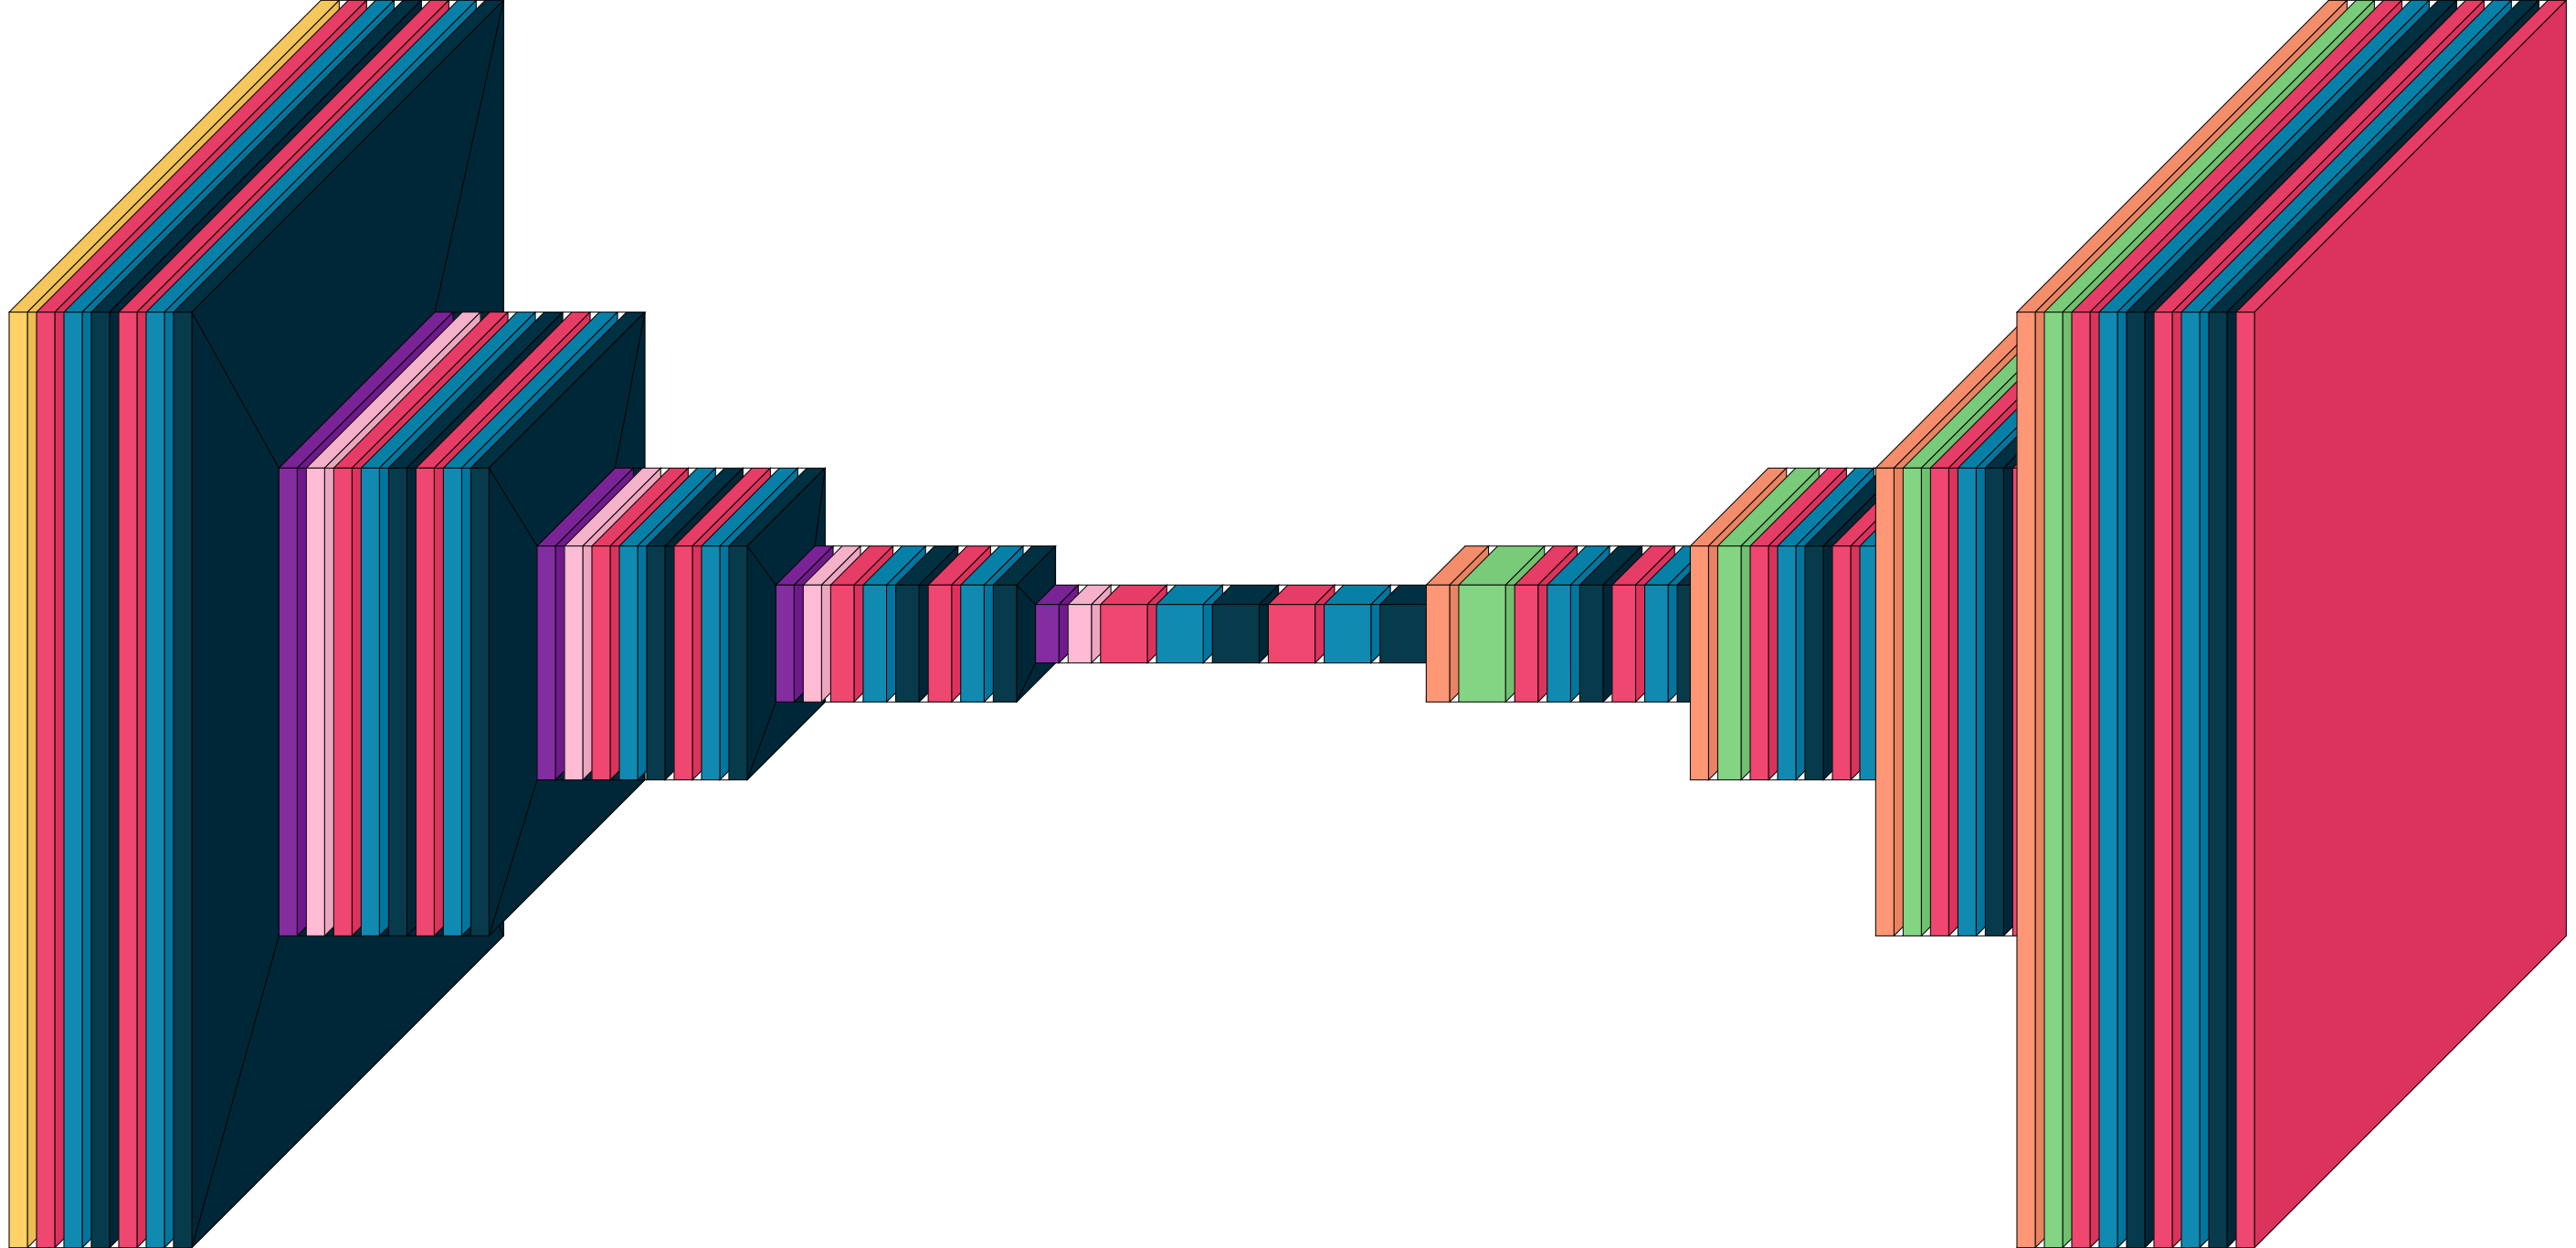

In [35]:
from visualkeras import layered_view
import visualkeras

visualkeras.layered_view(model)

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True,show_layer_names=True)

In [51]:
history = model.fit(x_train,y_train,
                   epochs = 50,
                   validation_data = (x_val,y_val),
                    callbacks = [early_stop,reduce_lr,Model_Chekpoint]
                   )

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_72']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5907 - loss: 0.7593   
Epoch 1: val_loss improved from inf to 13515.56934, saving model to seg_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.5970 - loss: 0.7522 - val_accuracy: 0.2418 - val_loss: 13515.5693 - learning_rate: 0.0010
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.8527 - loss: 0.4118
Epoch 2: val_loss improved from 13515.56934 to 1869.64478, saving model to seg_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 645ms/step - accuracy: 0.8532 - loss: 0.4106 - val_accuracy: 0.2536 - val_loss: 1869.6448 - learning_rate: 0.0010
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.8794 - loss: 0.3303
Epoch 3: val_loss improved from 1869.64478 to 146.80585, saving model to seg_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 651ms/step - accuracy: 0.8797 - loss: 0.3296 - val_accuracy: 0.2901 - val_loss: 146.8058 - learning_rate: 0.0010
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - acc

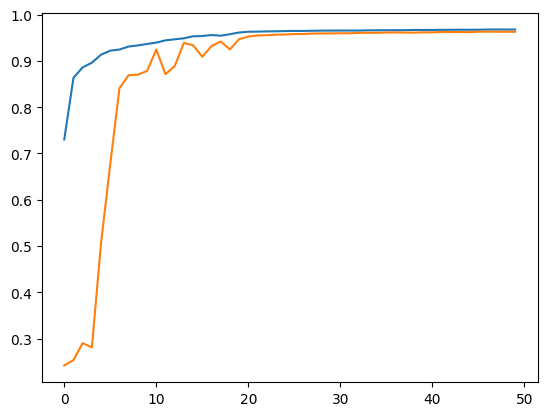

In [54]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

(1, 256, 256, 3)


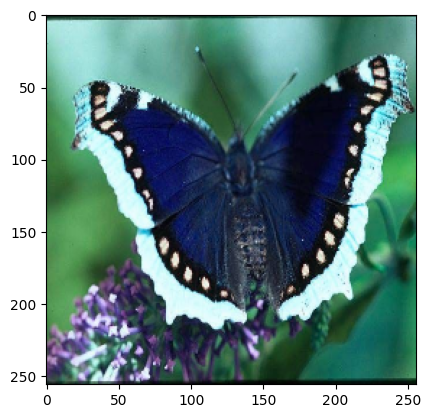

In [64]:
plt.imshow(pred_image)
# print(pred_image.shape)
pred_image = np.expand_dims(pred_image,axis=0)
print(pred_image.shape)

In [65]:
preds = model.predict(pred_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [66]:
# plt.imshow(preds)
preds.shape
preds = np.reshape(preds,(256,256,1))
preds.shape

(256, 256, 1)

In [69]:
# 
# plt.imshow(pred_image)
pred_image.shape


(1, 256, 256, 3)

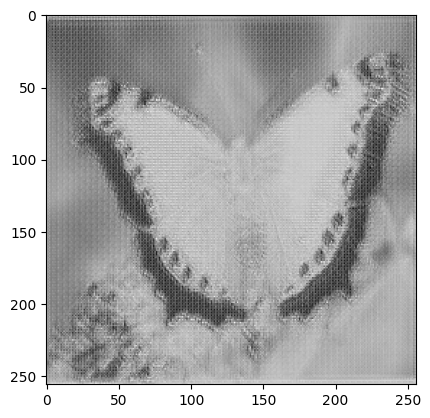

In [70]:
plt.imshow(preds,cmap="gray")

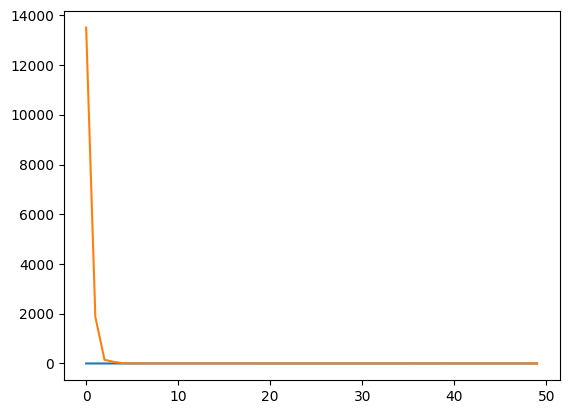

In [56]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [58]:
import time

start_time = time.time()
prediction = model.predict(x_val)

end_time = time.time()

tim_to_predict = start_time-end_time

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step


In [68]:
import numpy as np

def numpy_iou(y_true, y_pred, threshold=0.5):
    y_pred_bin = (y_pred > threshold).astype(np.float32)
    y_true = y_true.astype(np.float32)

    intersection = np.sum(y_true * y_pred_bin)
    union = np.sum(y_true) + np.sum(y_pred_bin) - intersection

    return (intersection + 1.0) / (union + 1.0)


In [69]:
# Predict
start_time = time.time()
prediction = model.predict(x_val)
end_time = time.time()

print(f"Time to predict: {end_time - start_time:.2f} seconds")

# Compute IoU
iou = numpy_iou(y_val, prediction)
print(f"IOU: {iou:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
Time to predict: 1.44 seconds
IOU: 0.9248


In [70]:
model.save("seg.h5")